#  The Project  Question

#### Crime in Chicago has been worrisome to the Chicago PD. Reported crimes have been tracked on a daily basis since 2001 and have been provided in the project data file. The Chicago PD would like to drastically reduce the spate of violent crimes reported in the city. Being effective involves knowing crime patterns and where they are likely to occur. It also involves equipping the Police Department appropriately. They have recruited you to conduct full data analytics and predictive modeling to uncover insights from the data that can be used to effectively mobilize and respond to crimes in shorter time cycles. They are interested in gleaning any insights that can help them determine What type of crimes to prepare for, Where these crimes are most likely to occur, What days of the week and periods to expect these crimes


#  The Project  Task

### Conduct complete data analytics and predictive modeling to predict crime types by day type and district


In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier as dc
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.linear_model import LogisticRegression as lr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import Lasso as ls
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC as SV
from sklearn.decomposition import PCA
from xgboost import XGBClassifier as xg
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error, f1_score, precision_score, recall_score,r2_score
from sklearn.neighbors import KNeighborsRegressor

In [174]:
import pandas

# IMPORT DATASET

In [175]:
data2 = pd.read_csv('crime_data_Proj1.csv')
data2.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"


In [176]:
data = data2.iloc[:100000,:]

In [177]:
f"Data shape is {data.shape}",f" Data size is  {data.size}"

('Data shape is (100000, 23)', ' Data size is  2300000')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   ID                    100000 non-null  int64  
 2   Case Number           100000 non-null  object 
 3   Date                  100000 non-null  object 
 4   Block                 100000 non-null  object 
 5   IUCR                  100000 non-null  object 
 6   Primary Type          100000 non-null  object 
 7   Description           100000 non-null  object 
 8   Location Description  99890 non-null   object 
 9   Arrest                100000 non-null  bool   
 10  Domestic              100000 non-null  bool   
 11  Beat                  100000 non-null  int64  
 12  District              100000 non-null  float64
 13  Ward                  91788 non-null   float64
 14  Community Area        91802 non-null   float64
 15  F

In [51]:
data.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

## DATA CLEANING

### Removing the unamed index

In [52]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [53]:
data.shape

(100000, 22)

### checking for missing value

In [54]:
data.isna().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     110
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                    8212
Community Area          8198
FBI Code                   0
X Coordinate            1075
Y Coordinate            1075
Year                       0
Updated On                 0
Latitude                1075
Longitude               1075
Location                1075
dtype: int64

### droping missing values

In [55]:
data.dropna(inplace=True)


### checking for duplicate

In [56]:
data.duplicated().sum()

0

### COVERTING DATE FROM STRING TO DATE TIME

In [57]:
data['Date'] = pd.to_datetime(data['Date'])


### EXTRACTING DAY,MONTH HOUR FROM DATE

In [58]:
data['Month'] = data['Date'].dt.month
data['week'] = data['Date'].dt.week
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour

### Extracting and creating  Period columns

In [59]:
x = list(data['Month'].values)
period = []
for m in x :
    if m in (3,4,5):
        period.append('spring')
    elif m in (6,7,8):
        period.append('summer')
    elif m in (9,10,11):
        period.append('fall')
    elif m in (12,1,2):
        period.append('winter')
data['period'] = period

# DATA EXPLORATORY ANALYSIS

In [60]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,90753.0,7.315333e+06,3.182730e+06,794.000000,4.487934e+06,7.317905e+06,1.011467e+07,1.277887e+07
Beat,90753.0,1.184258e+03,7.014932e+02,111.000000,6.210000e+02,1.034000e+03,1.724000e+03,2.535000e+03
District,90753.0,1.130266e+01,6.935140e+00,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,90753.0,2.275873e+01,1.382474e+01,1.000000,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,90753.0,3.745677e+01,2.154513e+01,1.000000,2.300000e+01,3.200000e+01,5.700000e+01,7.700000e+01
X Coordinate,90753.0,1.164553e+06,1.668970e+04,0.000000,1.152907e+06,1.166027e+06,1.176361e+06,1.205116e+06
Y Coordinate,90753.0,1.885735e+06,3.202440e+04,0.000000,1.858942e+06,1.890661e+06,1.909429e+06,1.951517e+06
Year,90753.0,2.010355e+03,5.708080e+00,2001.000000,2.005000e+03,2.010000e+03,2.015000e+03,2.022000e+03
Latitude,90753.0,4.184205e+01,8.809805e-02,36.619446,4.176836e+01,4.185577e+01,4.190715e+01,4.202256e+01
Longitude,90753.0,-8.767167e+01,6.057310e-02,-91.686566,-8.771397e+01,-8.766616e+01,-8.762828e+01,-8.752453e+01


###  How many crimes occur per period

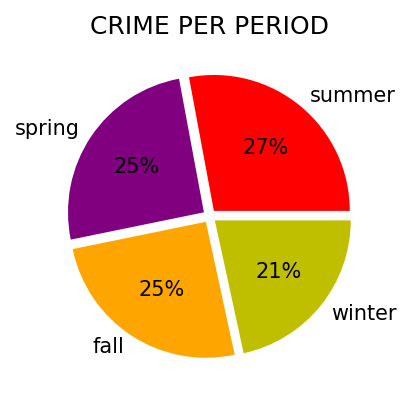

summer    25350
fall      22946
spring    22855
winter    19602
Name: period, dtype: int64

In [61]:
plt.figure(figsize=(5,3),dpi=150)
x = data['period'].value_counts()
labels = ['summer','spring','fall','winter']
colors = ['r','purple','orange','y']
plt.pie(x,explode=[.05,.05,.05,.05],autopct="%d%%",labels=labels,colors=colors)

plt.title('CRIME PER PERIOD')
plt.savefig('crime_per_period.png')
plt.show()
x

### TOP 3 NUMBER OF CRIME TYPE 

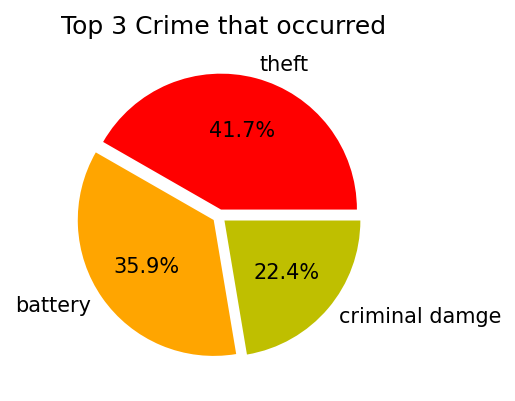

THEFT              19436
BATTERY            16745
CRIMINAL DAMAGE    10415
Name: Primary Type, dtype: int64

In [62]:
plt.figure(figsize=(5,3),dpi=150)
crimetype = data['Primary Type'].value_counts()[:3]
labels = ['theft','battery','criminal damge']
colors = ['red','orange','y']
plt.pie(crimetype,explode=[.05,.05,.05],labels=labels,autopct='%.1f%%',colors=colors)
plt.title(' Top 3 Crime that occurred')
plt.savefig('top_3_crime.png')
plt.show()
crimetype

### less 3 crime committed

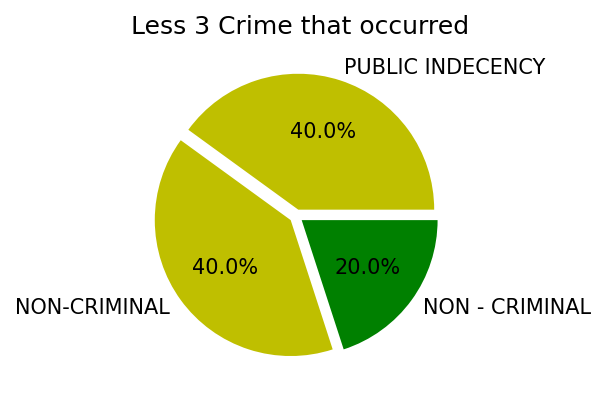

PUBLIC INDECENCY    2
NON-CRIMINAL        2
NON - CRIMINAL      1
Name: Primary Type, dtype: int64

In [63]:
plt.figure(figsize=(5,3),dpi=150)
crimetype = data['Primary Type'].value_counts()[-3:]
labels = ['PUBLIC INDECENCY','NON-CRIMINAL','NON - CRIMINAL']
colors = ['y','y','g']
plt.pie(crimetype,explode=[.05,.05,.05],labels=labels,autopct='%.1f%%',colors=colors)
plt.title(' Less 3 Crime that occurred')
plt.savefig('less_3_crime1.png')
plt.show()
crimetype

# Top 3 CRIME PER MONTH

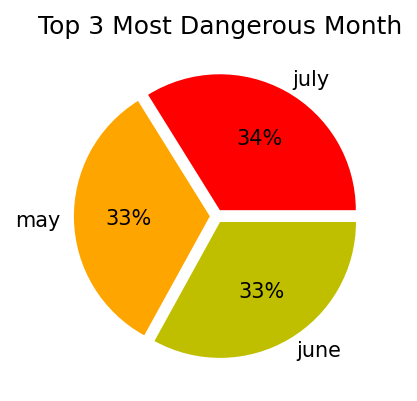

7    8633
5    8446
6    8417
Name: Month, dtype: int64

In [64]:
plt.figure(figsize=(5,3),dpi=150)
crime_month = data['Month'].value_counts()[:3]
colors = ['red','orange','y']
label = ['july','may','june']
plt.pie(crime_month,explode=[.05,.05,.05],colors=colors,labels=label,autopct='%2.f%%')
plt.title(' Top 3 Most Dangerous Month')
plt.savefig('top_3_month_with_highest_crime.png')
plt.show()
crime_month

### Top 3 Crime per year

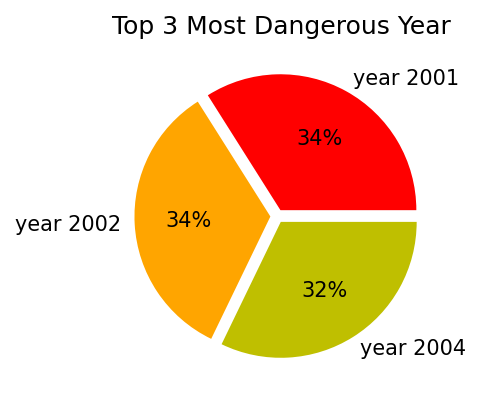

2004    6225
2003    6204
2005    5895
Name: Year, dtype: int64

In [65]:
plt.figure(figsize=(5,3),dpi=150)
crime_year = data['Year'].value_counts()[:3]
colors = ['red','orange','y']
label = ['year 2001','year 2002','year 2004']
plt.pie(crime_year,explode=[.05,.05,.05],colors=colors,labels=label,autopct='%2.f%%')
plt.title(' Top 3 Most Dangerous Year')
plt.savefig('top_3_year_with_higest_crime.png')
plt.show()
crime_year

### Top 3 year with less crime

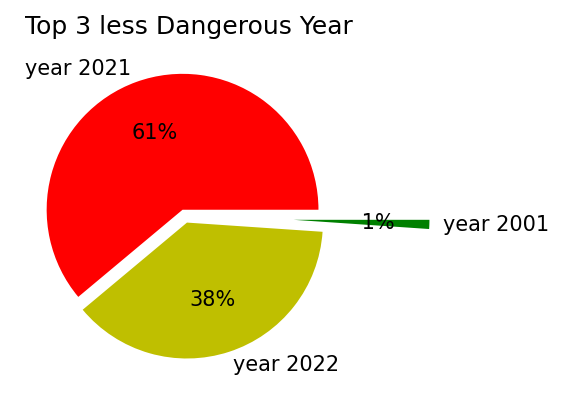

2021    2660
2022    1648
2001      47
Name: Year, dtype: int64

In [66]:
plt.figure(figsize=(5,3),dpi=150)
crime_year = data['Year'].value_counts()[-3:]
colors = ['red','y','g']
label = ['year 2021','year 2022','year 2001']
plt.pie(crime_year,explode=[.05,.05,.8],colors=colors,labels=label,autopct='%2.f%%')
plt.title(' Top 3 less Dangerous Year')
plt.savefig('top_3_year_with_less_crime1.png')
plt.show()
crime_year

### Top 3 highest crime Location

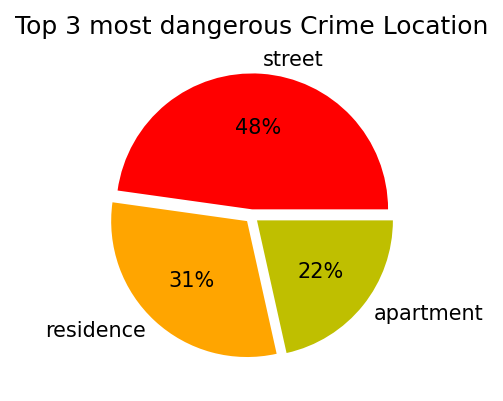

STREET       23250
RESIDENCE    14939
APARTMENT    10465
Name: Location Description, dtype: int64

In [67]:
plt.figure(figsize=(5,3),dpi=150)
crime_location = data['Location Description'].value_counts()[:3]
colors =['red','orange','y']
label = ['street','residence','apartment']
plt.pie(crime_location,explode=[.05,.05,.05],colors=colors,labels=label,autopct='%2.f%%')
plt.title('Top 3 most dangerous Crime Location')
plt.savefig('top_3_crime_location4.png')
plt.show()
crime_location

### Top 3 less dangerous location

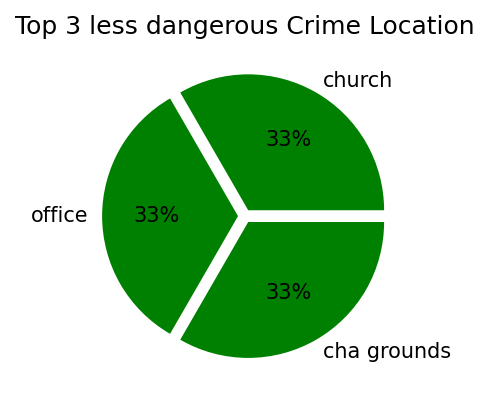

GARAGE                       1
CHURCH                       1
CTA TRACKS - RIGHT OF WAY    1
Name: Location Description, dtype: int64

In [68]:
plt.figure(figsize=(5,3),dpi=150)
crime_location = data['Location Description'].value_counts()[-4:-1]
colors =['g','g','g']
label = ['church','office','cha grounds']
plt.pie(crime_location,explode=[.05,.05,.05],colors=colors,labels=label,autopct='%2.f%%')
plt.title('Top 3 less dangerous Crime Location')
plt.savefig('top_3_less_crime_location2.png')
plt.show()
crime_location

### Number of arrest made

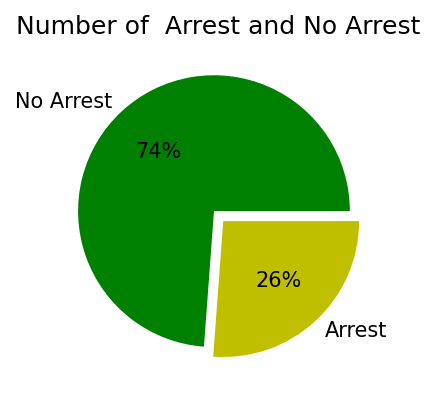

False    66997
True     23756
Name: Arrest, dtype: int64

In [69]:
plt.figure(figsize=(5,3),dpi=150)
arrest = data['Arrest'].value_counts()[:3]
colors = ['g','y']
label = ['No Arrest','Arrest']
plt.pie(arrest,explode=[.05,.05],colors=colors,labels=label,autopct='%2.f%%')
plt.title('Number of  Arrest and No Arrest')
plt.savefig('no_arrest_vs_arrest.png')
plt.show()
arrest

(2376, 21380)

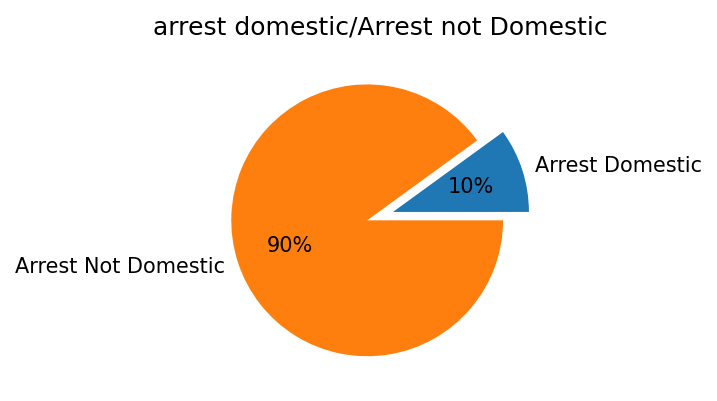

In [70]:
plt.figure(figsize=(5,3),dpi=150)
arrest_domestic = data.loc[(data['Arrest']==True) & (data['Domestic']==True)].count()[0]
arrest_not_domestic = data.loc[(data['Arrest']==True) & (data['Domestic']==False)].count()[0]
label = ['Arrest Domestic','Arrest Not Domestic']
plt.pie([arrest_domestic,arrest_not_domestic],explode=[.1,.1],autopct='%2.f%%',labels=label)
plt.title('arrest domestic/Arrest not Domestic')
plt.savefig('arrest_not_domestic_vs_arrest_domestic2.png')
arrest_domestic,arrest_not_domestic

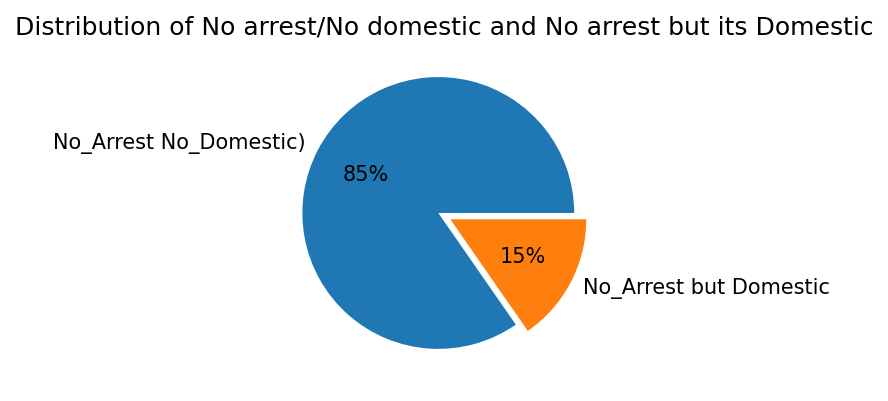

(56718, 10279)

In [71]:
plt.figure(figsize=(5,3),dpi=150)
nand = data.loc[(data['Arrest'] == False) & (data['Domestic'] == False)].count()[0]
nad = data.loc[(data['Arrest'] == False) & (data['Domestic'] == True)].count()[0]
label = ['No_Arrest No_Domestic)','No_Arrest but Domestic']
plt.pie([nand,nad],explode=[.05,.05],autopct='%2.f%%',labels=label)
plt.title('Distribution of No arrest/No domestic and No arrest but its Domestic')
plt.savefig('no_arrest_no_domestic_no_arrest_domestic.png')
plt.show()
nand,nad

###  converting categorical data to numeric

In [72]:
w = data.columns
p = ['Block', 'IUCR', 'Primary Type', 'Description','Location Description', 'Arrest', 'Domestic','period','Location']
le = LabelEncoder()
for x in p:
    data[x] = le.fit_transform(data[x])

### Box plot of the distribution of the data

In [73]:
features = ['week','Block', 'Primary Type',
       'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'Year','X Coordinate', 'Y Coordinate',
        'Month',  'day', 'hour', 'period','Description']


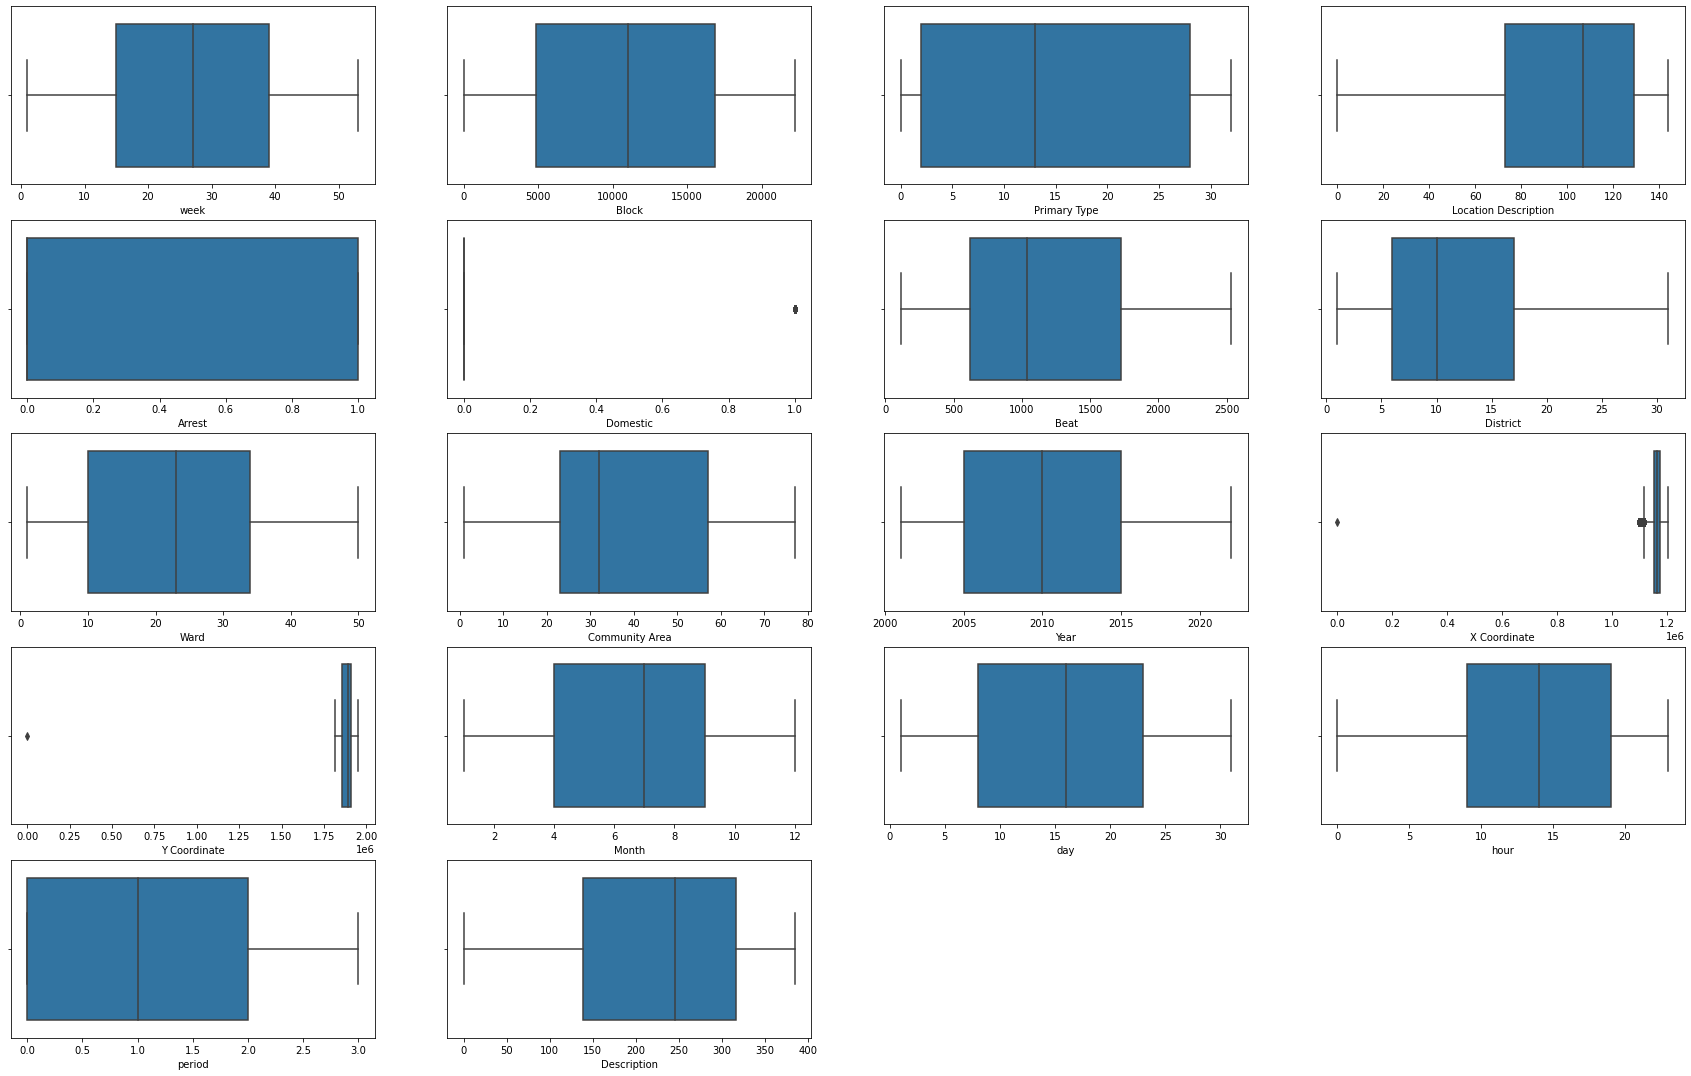

In [74]:
count = 0
plt.figure(figsize=(30,70))
for feature in features:
    count += 1
    plt.subplot(18,4 ,count)
    sns.boxplot(x = data[feature]);

### Removing outlier

In [75]:
 new_data = data.loc[:,features]

In [76]:
# Removing outliers
def Outliers(data, feature):
    IQ1 = data[feature].quantile(0.25)
    IQ3 = data[feature].quantile(0.75)
    IQR = IQ3 - IQ1
    
    lower_bound = IQ1 - 1.5 * IQR
    upper_bound = IQ3 + 1.5 * IQR
    
    index = data.index[ (data[feature] < lower_bound) | (data[feature] > upper_bound) ]
    return index

In [77]:
# Getting index of all the outliers
index = []
for i in new_data.columns: 
        index.extend(Outliers(new_data, i))
index = set(index)
print("Total number of outliers are {}".format(len(index)))

# Dropping all the outliers
new_data.drop(index, inplace = True, axis = 0)
new_data.shape

Total number of outliers are 13033


(77720, 18)

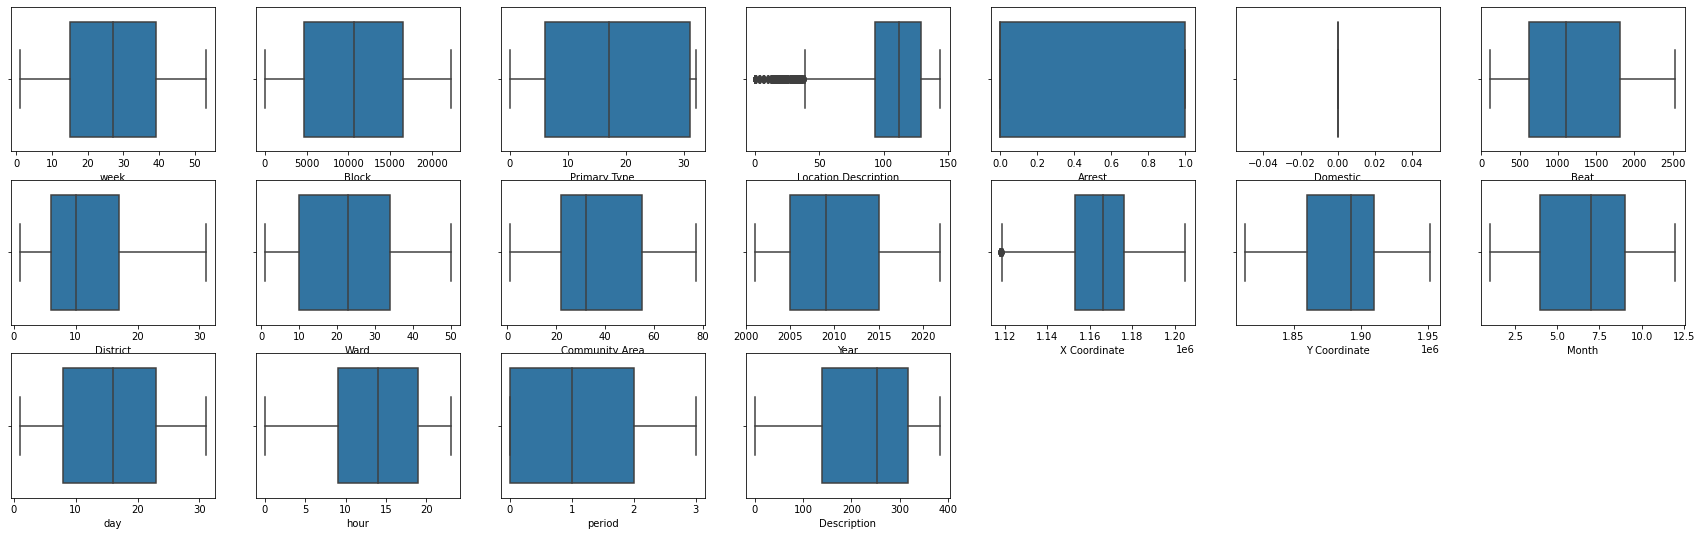

In [78]:
y = list(new_data.columns)
t = 0
plt.figure(figsize=(30,60))
for w in y:
    t += 1
    plt.subplot(19,7,t)
    sns.boxplot(x=new_data[w])



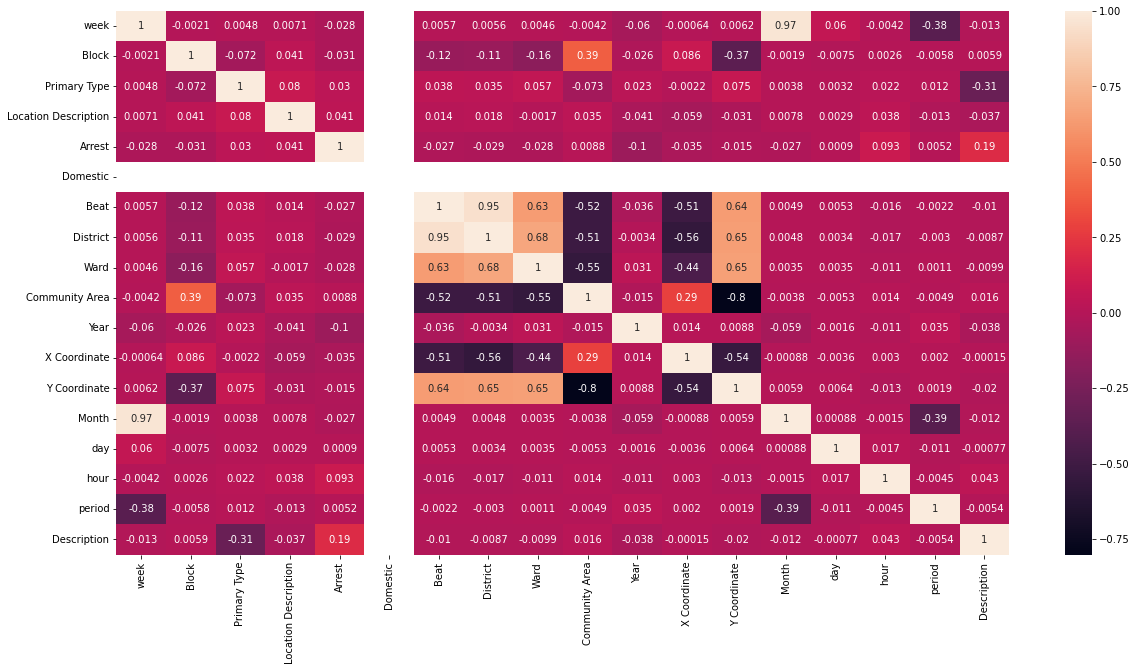

In [79]:
x = new_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(x,annot=True,);

 REMOVING MULTICOLINEARITY ignored

def correlation(data,threshold):
    correlated = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[j]
                correlated.add(colname)
    return correlated

corr_feature = correlation(new_data,0.9)
corr_feature

new_data.drop(labels=corr_feature,axis=1,inplace=True)

### Droping period to reduce noise

In [80]:
new_data.drop('period',axis=1,inplace=True)

### MAKING A NEW COPY OF DATA

In [81]:
data6 = new_data.copy()
new_data.isna().sum()

week                    0
Block                   0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
Year                    0
X Coordinate            0
Y Coordinate            0
Month                   0
day                     0
hour                    0
Description             0
dtype: int64

### MODEL FOR CRIME TYPE

In [82]:
data6.drop('Primary Type',axis=1,inplace=True)
data6['Primary Type'] = new_data['Primary Type']
data7 = data6.copy()
data7.head(2)

,week,Block,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,X Coordinate,Y Coordinate,Month,day,hour,Description,Primary Type
0,30,19879,129,0,0,423,4.0,10.0,46.0,2008,1196638.0,1848800.0,7,26,14,350,6
1,31,20399,105,1,0,413,4.0,8.0,47.0,2018,1184499.0,1843935.0,7,31,10,356,32


### RESCALING , STANDADIZE , NORMALIZED

In [38]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
dataframe = data7
array = dataframe.values
X = array[:,:-1]
Y = array[:,-1]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledx = scaler.fit_transform(X)

x = pd.DataFrame(rescaledx,columns=data6.columns[:-1])
x['Primary Type'] = Y
x

#standardize
dataframe = x
array = dataframe.values
X = array[:,:-1]
Z = array[:,-1]
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)
# summarize transformed data
y = pd.DataFrame(standardX,columns=data6.columns[:-1])
y['Primary Type'] = Y

#Normalized

dataframe = y
array = dataframe.values
X = array[:,:-1]
Y = array[:,-1]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)


z = pd.DataFrame(normalizedX,columns=data6.columns[:-1])
z['Primary Type'] = Y


array([ 6., 32.,  3., ..., 31.,  3., 31.])

###  Feature Extraction with RFE

In [85]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

array = z.values
X = array[:,0:-1]
Y = array[:,-1]
# feature extraction
model = LinearRegression()
featurelist = [4,5,6]
a = []
b = []
c = []
for numFea in featurelist:
    
    
    rfe = RFE(model, n_features_to_select=numFea)
    fit = rfe.fit(X, Y)
    print("Num Features: {}".format(fit.n_features_)) 
    print("Selected Features: {}".format(fit.support_))
    print("Feature Ranking: {}".format(fit.ranking_)) 
    if numFea == featurelist[0] :
        for index,value in enumerate(list(fit.ranking_)):
            if value ==1:
                a.append(index)
    elif numFea == featurelist[1] :
        for index,value in enumerate(list(fit.ranking_)):
            if value ==1:
                b.append(index)
    elif numFea == featurelist[2] :
        for index,value in enumerate(list(fit.ranking_)):
            if value ==1:
                c.append(index)
    
            
    
            
    

Num Features: 4
Selected Features: [False False  True  True False False False False False False False  True
 False False False  True]
Feature Ranking: [ 7  3  1  1 13 11 10  4  9  6  2  1  8 12  5  1]
Num Features: 5
Selected Features: [False False  True  True False False False False False False  True  True
 False False False  True]
Feature Ranking: [ 6  2  1  1 12 10  9  3  8  5  1  1  7 11  4  1]
Num Features: 6
Selected Features: [False  True  True  True False False False False False False  True  True
 False False False  True]
Feature Ranking: [ 5  1  1  1 11  9  8  2  7  4  1  1  6 10  3  1]


In [86]:
a,b,c,len(data7.columns)

([2, 3, 11, 15], [2, 3, 10, 11, 15], [1, 2, 3, 10, 11, 15], 17)

In [96]:
new3 = z.iloc[:,[1, 2, 3, 10, 11, 15,16]]
new3.head(1)

,Block,Location Description,Arrest,X Coordinate,Y Coordinate,Description,Primary Type
0,0.366419,0.199128,-0.159281,0.530574,-0.314231,0.292081,6.0


In [113]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier as dc
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.linear_model import LogisticRegression as lr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import Lasso as ls
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC as SV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

array = new3.values
X = array[:,0:-1]
Y = array[:,-1]
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = lda()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: {} ({})".format(results.mean(), results.std())) 


Accuracy: 0.41340710241893974 (0.007573668523232045)


In [114]:
array = new3.values
X = array[:,0:-1]
Y = array[:,-1]
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestRegressor()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# print("Accuracy: {} ({})".format(results.mean(), results.std())) 
print(results)

KeyboardInterrupt: 

In [102]:
models = [dc,lda,KN,R]
def model(alg,data):
    array = data.values
    X = array[:,0:-1]
    Y = array[:,-1]
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    model = alg()
    scoring = 'accuracy'
    results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    print(" Accuracy: {} ({})  {}".format(results.mean(), results.std(),str(alg).split('.')[-1]))


In [103]:
for x in models:
    model(x,new3)

 Accuracy: 0.792717447246526 (0.004962611674860181)  DecisionTreeClassifier'>
 Accuracy: 0.41340710241893974 (0.007573668523232045)  LinearDiscriminantAnalysis'>
 Accuracy: 0.5983659289758106 (0.00436454352662595)  KNeighborsClassifier'>


KeyboardInterrupt: 

In [215]:
x = new3.iloc[:,:-1]
y = new3.iloc[:,-1]

In [216]:
#Building Models

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [217]:
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    #     print("Print accuracy on Training data is {}".format(tr_auc))
    
    predicted = cla.predict(xtest)
    te_auc = accuracy_score(predicted, ytest)*100

    Recall = recall_score(predicted, ytest, average = 'micro')
    
    Precision = precision_score(predicted, ytest, average = 'micro')
    
    F1 = f1_score(predicted, ytest, average = 'micro')
    
    MSE = mean_squared_error(predicted, ytest)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['Recall'].append(Recall)
    d['Precision'].append(Precision)
    d['F1_Score'].append(F1)
    d['MSE'].append(MSE)
    
    print("**********"*5)
    print()
    return d

In [111]:
d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 'Recall': [], 'Precision': [], 'F1_Score': [], 'MSE': []}
models = [ [RandomForestClassifier(n_estimators = 350), 'Random Forest'], [DecisionTreeClassifier(), 'Decision Tree'],  [CatBoostClassifier(), 'CatBoost'], [GaussianNB(), 'Naive Bayes'], [LogisticRegression(), 'Logistic Regression'], [SVC(), 'Support Vector Machine'] ]

for model in models:
    d = Models(model[0], model[1], d)

acu_data = pd.DataFrame(data = d)

NameError: name 'Models' is not defined

In [219]:
acu_data

,Name,Training ACU,Testing ACU,Recall,Precision,F1_Score,MSE
0,Random Forest,100.000000,77.373906,0.773739,0.773739,0.773739,41.286799
1,Decision Tree,100.000000,79.850746,0.798507,0.798507,0.798507,28.908518
2,CatBoost,82.634779,78.930777,0.789308,0.789308,0.789308,37.966740
3,Naive Bayes,42.804297,42.981215,0.429812,0.429812,0.429812,174.893850
4,Logistic Regression,43.251415,43.412249,0.434122,0.434122,0.434122,183.232823
5,Support Vector Machine,59.688626,59.720793,0.597208,0.597208,0.597208,134.712365


### PREDICTING CRIME DISTRICT

In [220]:
data7 = new_data.copy()
data7.drop('District',axis=1,inplace=True)
data7['District'] = new_data['District']
data8 = data7.copy()
data8.head(2)

,week,Block,Primary Type,Location Description,Arrest,Domestic,Beat,Ward,Community Area,Year,X Coordinate,Y Coordinate,Month,day,hour,Description,District
0,30,19879,6,129,0,0,423,10.0,46.0,2008,1196638.0,1848800.0,7,26,14,350,4.0
1,31,20399,32,105,1,0,413,8.0,47.0,2018,1184499.0,1843935.0,7,31,10,356,4.0


### RESCALING , STANDADIZE , NORMALIZED

In [221]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
dataframe = data8
array = dataframe.values
X = array[:,:-1]
Y = array[:,-1]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledx = scaler.fit_transform(X)
set_printoptions(precision=3)
print(rescaledx[0:5,:])

x = pd.DataFrame(rescaledx,columns=data7.columns[:-1])
x['District'] = Y
x

dataframe = x
array = dataframe.values
X = array[:,:-1]
Y = array[:,-1]
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)
# summarize transformed data


y = pd.DataFrame(standardX,columns=data7.columns[:-1])
y['District'] = Y


# Normalize data (length of 1)

dataframe = y
array = dataframe.values
X = array[:,:-1]
Y = array[:,-1]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=5)
print(normalizedX[0:5,:])

z = pd.DataFrame(normalizedX,columns=data7.columns[:-1])
z['District'] = Y


[[0.558 0.894 0.188 0.896 0.    0.    0.129 0.184 0.592 0.333 0.903 0.254
  0.545 0.833 0.609 0.909]
 [0.577 0.918 1.    0.729 1.    0.    0.125 0.143 0.605 0.81  0.764 0.218
  0.545 1.    0.435 0.925]
 [0.308 0.755 0.094 0.743 1.    0.    0.66  0.776 0.145 0.286 0.334 0.924
  0.273 0.867 0.435 0.416]
 [0.558 0.007 0.031 0.632 0.    0.    0.414 0.551 0.329 0.81  0.351 0.625
  0.545 0.733 0.348 0.823]
 [0.5   0.248 0.031 0.694 0.    0.    0.462 0.531 0.355 0.952 0.546 0.607
  0.545 0.333 0.261 0.042]]
[[ 0.05374  0.37132 -0.22589  0.20179 -0.16141  0.      -0.28806 -0.24372
   0.1149  -0.10164  0.53768 -0.31844  0.03039  0.30909  0.03086  0.29599]
 [ 0.06187  0.33773  0.31013  0.03362  0.36914  0.      -0.25121 -0.24219
   0.10946  0.31279  0.28634 -0.30943  0.02617  0.3945  -0.1089   0.26653]
 [-0.17334  0.23525 -0.27976  0.05014  0.40868  0.       0.18367  0.28713
  -0.28717 -0.14119 -0.28824  0.43693 -0.19738  0.32303 -0.12056 -0.12807]
 [ 0.06357 -0.50113 -0.40056 -0.06611 -0.19095 

### feature selection for district

In [222]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

array = z.values
X = array[:,0:-1]
Y = array[:,-1]
# feature extraction
model = lda()
featurelist = [9,11,13]
a = []
b = []
c = []
for numFea in featurelist:
    
    
    rfe = RFE(model, n_features_to_select=numFea)
    fit = rfe.fit(X, Y)
    print("Num Features: {}".format(fit.n_features_)) 
    print("Selected Features: {}".format(fit.support_))
    print("Feature Ranking: {}".format(fit.ranking_)) 
    if numFea == featurelist[0] :
        for index,value in enumerate(list(fit.ranking_)):
            if value ==1:
                a.append(index)
    elif numFea == featurelist[1] :
        for index,value in enumerate(list(fit.ranking_)):
            if value ==1:
                b.append(index)
    elif numFea == featurelist[2] :
        for index,value in enumerate(list(fit.ranking_)):
            if value ==1:
                c.append(index)
    
            
    
            
    

Num Features: 9
Selected Features: [False  True False  True  True False  True  True  True  True  True  True
 False False False False]
Feature Ranking: [5 1 2 1 1 8 1 1 1 1 1 1 6 7 4 3]
Num Features: 11
Selected Features: [False  True  True  True  True False  True  True  True  True  True  True
 False False False  True]
Feature Ranking: [3 1 1 1 1 6 1 1 1 1 1 1 4 5 2 1]
Num Features: 13
Selected Features: [ True  True  True  True  True False  True  True  True  True  True  True
 False False  True  True]
Feature Ranking: [1 1 1 1 1 4 1 1 1 1 1 1 2 3 1 1]


In [223]:
a,b,c

([1, 3, 4, 6, 7, 8, 9, 10, 11],
 [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 15],
 [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15])

In [224]:
new_data3 = z.iloc[:, [0, 2, 3, 6, 9, 10, 11, 12, 15,16]]
new_data3

,week,Primary Type,Location Description,Beat,Year,X Coordinate,Y Coordinate,Month,Description,District
0,0.053739,-0.225888,0.201793,-0.288059,-0.101640,0.537675,-0.318436,0.030394,0.295991,4.0
1,0.061869,0.310126,0.033618,-0.251212,0.312794,0.286344,-0.309433,0.026167,0.266527,4.0
2,-0.173343,-0.279759,0.050145,0.183667,-0.141193,-0.288239,0.436931,-0.197382,-0.128067,17.0
3,0.063572,-0.400561,-0.066112,-0.035210,0.429804,-0.328233,0.132335,0.035956,0.261729,11.0
4,-0.000718,-0.384681,0.005843,0.015377,0.571236,0.011868,0.103728,0.034530,-0.523202,12.0
...,...,...,...,...,...,...,...,...,...,...
77715,0.319254,-0.223011,-0.398285,-0.153477,0.354782,0.069619,-0.196200,0.300725,0.156110,6.0
77716,-0.340001,-0.289280,-0.088495,0.234063,-0.100173,0.155136,0.138312,-0.360136,0.300648,18.0
77717,0.083490,0.313301,0.048812,-0.267955,0.078255,0.465425,-0.243887,0.101646,-0.460907,4.0
77718,0.135336,-0.314681,0.056404,0.206995,-0.158818,-0.278053,0.427027,0.117455,-0.314039,17.0


In [225]:
models = [dc,lda,KN]
def model(alg,data):
    array = data.values
    X = array[:,0:-1]
    Y = array[:,-1]
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    model = alg()
    scoring = 'accuracy'
    results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    print(" Accuracy: {} ({})  {}".format(results.mean(), results.std(),str(alg).split('.')[-1]))


In [226]:
for mod in models:
    model(mod,new_data3)

 Accuracy: 0.9729799279464745 (0.0016070504370557003)  DecisionTreeClassifier'>
 Accuracy: 0.8512480699948533 (0.003653984505776271)  LinearDiscriminantAnalysis'>
 Accuracy: 0.8207153885743695 (0.0053309771625161696)  KNeighborsClassifier'>


In [227]:
x = new_data3.iloc[:,:-1]
y = new_data3.iloc[:,-1]

In [228]:
#Building Models

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [229]:
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    #     print("Print accuracy on Training data is {}".format(tr_auc))
    
    predicted = cla.predict(xtest)
    te_auc = accuracy_score(predicted, ytest)*100

    Recall = recall_score(predicted, ytest, average = 'micro')
    
    Precision = precision_score(predicted, ytest, average = 'micro')
    
    F1 = f1_score(predicted, ytest, average = 'micro')
    
    MSE = mean_squared_error(predicted, ytest)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['Recall'].append(Recall)
    d['Precision'].append(Precision)
    d['F1_Score'].append(F1)
    d['MSE'].append(MSE)
    
    print("**********"*5)
    print()
    return d

In [230]:
d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 'Recall': [], 'Precision': [], 'F1_Score': [], 'MSE': []}
models = [ [RandomForestClassifier(n_estimators = 350), 'Random Forest'], [DecisionTreeClassifier(), 'Decision Tree'], [CatBoostClassifier(), 'CatBoost'], [GaussianNB(), 'Naive Bayes'], [LogisticRegression(), 'Logistic Regression'], [SVC(), 'Support Vector Machine'] ]

for model in models:
    d = Models(model[0], model[1], d)

acu_data = pd.DataFrame(data = d)

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on CatBoost model
Learning rate set to 0.097678
0:	learn: 2.2754516	total: 268ms	remaining: 4m 27s
1:	learn: 1.8772987	total: 529ms	remaining: 4m 23s
2:	learn: 1.6424383	total: 780ms	remaining: 4m 19s
3:	learn: 1.4598416	total: 1.04s	remaining: 4m 19s
4:	learn: 1.3263646	total: 1.29s	remaining: 4m 17s
5:	learn: 1.2063921	total: 1.56s	remaining: 4m 18s
6:	learn: 1.1119235	total: 1.81s	remaining: 4m 16s
7:	learn: 1.0248034	total: 2.06s	remaining: 4m 15s
8:	learn: 0.9554593	total: 2.31s	remaining: 4m 14s
9:	learn: 0.8954601	total: 2.58s	remaining: 4m 15s
10:	learn: 0.8415667	total: 2.84s	remaining: 4m 15s
11:	learn: 0.7995829	total: 3.09s	remaining: 4m 14s
12:	learn: 0.7552167	total: 3.34s	remaining: 4m 13s
13:	learn: 0.7167127	total: 3.6s	remaining: 4m 13s
14:	learn: 0.6835259	total: 3.85s	remaining: 4m 13s
15:	learn

154:	learn: 0.1111113	total: 39.5s	remaining: 3m 35s
155:	learn: 0.1104758	total: 39.8s	remaining: 3m 35s
156:	learn: 0.1101095	total: 40s	remaining: 3m 34s
157:	learn: 0.1093259	total: 40.3s	remaining: 3m 34s
158:	learn: 0.1089246	total: 40.5s	remaining: 3m 34s
159:	learn: 0.1084200	total: 40.8s	remaining: 3m 34s
160:	learn: 0.1080822	total: 41s	remaining: 3m 33s
161:	learn: 0.1076461	total: 41.3s	remaining: 3m 33s
162:	learn: 0.1069528	total: 41.6s	remaining: 3m 33s
163:	learn: 0.1065088	total: 41.8s	remaining: 3m 33s
164:	learn: 0.1059538	total: 42.1s	remaining: 3m 32s
165:	learn: 0.1053447	total: 42.3s	remaining: 3m 32s
166:	learn: 0.1047859	total: 42.6s	remaining: 3m 32s
167:	learn: 0.1045083	total: 42.8s	remaining: 3m 32s
168:	learn: 0.1040543	total: 43.1s	remaining: 3m 31s
169:	learn: 0.1035693	total: 43.3s	remaining: 3m 31s
170:	learn: 0.1033374	total: 43.6s	remaining: 3m 31s
171:	learn: 0.1027978	total: 43.9s	remaining: 3m 31s
172:	learn: 0.1020917	total: 44.1s	remaining: 3m 3

310:	learn: 0.0684176	total: 1m 19s	remaining: 2m 55s
311:	learn: 0.0682198	total: 1m 19s	remaining: 2m 55s
312:	learn: 0.0681241	total: 1m 19s	remaining: 2m 54s
313:	learn: 0.0679688	total: 1m 19s	remaining: 2m 54s
314:	learn: 0.0678675	total: 1m 20s	remaining: 2m 54s
315:	learn: 0.0677912	total: 1m 20s	remaining: 2m 54s
316:	learn: 0.0676842	total: 1m 20s	remaining: 2m 53s
317:	learn: 0.0675363	total: 1m 20s	remaining: 2m 53s
318:	learn: 0.0672952	total: 1m 21s	remaining: 2m 53s
319:	learn: 0.0670826	total: 1m 21s	remaining: 2m 53s
320:	learn: 0.0669122	total: 1m 21s	remaining: 2m 52s
321:	learn: 0.0666014	total: 1m 21s	remaining: 2m 52s
322:	learn: 0.0665135	total: 1m 22s	remaining: 2m 52s
323:	learn: 0.0663258	total: 1m 22s	remaining: 2m 51s
324:	learn: 0.0662196	total: 1m 22s	remaining: 2m 51s
325:	learn: 0.0660535	total: 1m 22s	remaining: 2m 51s
326:	learn: 0.0658164	total: 1m 23s	remaining: 2m 51s
327:	learn: 0.0657019	total: 1m 23s	remaining: 2m 50s
328:	learn: 0.0655949	total:

462:	learn: 0.0517462	total: 1m 57s	remaining: 2m 16s
463:	learn: 0.0516753	total: 1m 57s	remaining: 2m 16s
464:	learn: 0.0515905	total: 1m 58s	remaining: 2m 15s
465:	learn: 0.0515530	total: 1m 58s	remaining: 2m 15s
466:	learn: 0.0514976	total: 1m 58s	remaining: 2m 15s
467:	learn: 0.0513743	total: 1m 58s	remaining: 2m 15s
468:	learn: 0.0513133	total: 1m 59s	remaining: 2m 14s
469:	learn: 0.0512827	total: 1m 59s	remaining: 2m 14s
470:	learn: 0.0512091	total: 1m 59s	remaining: 2m 14s
471:	learn: 0.0511214	total: 1m 59s	remaining: 2m 14s
472:	learn: 0.0510475	total: 2m	remaining: 2m 13s
473:	learn: 0.0509574	total: 2m	remaining: 2m 13s
474:	learn: 0.0508804	total: 2m	remaining: 2m 13s
475:	learn: 0.0507583	total: 2m	remaining: 2m 13s
476:	learn: 0.0506998	total: 2m 1s	remaining: 2m 12s
477:	learn: 0.0506611	total: 2m 1s	remaining: 2m 12s
478:	learn: 0.0505918	total: 2m 1s	remaining: 2m 12s
479:	learn: 0.0505131	total: 2m 1s	remaining: 2m 12s
480:	learn: 0.0504791	total: 2m 2s	remaining: 2m

616:	learn: 0.0413129	total: 2m 36s	remaining: 1m 37s
617:	learn: 0.0412349	total: 2m 36s	remaining: 1m 36s
618:	learn: 0.0411865	total: 2m 36s	remaining: 1m 36s
619:	learn: 0.0411424	total: 2m 37s	remaining: 1m 36s
620:	learn: 0.0411007	total: 2m 37s	remaining: 1m 36s
621:	learn: 0.0410648	total: 2m 37s	remaining: 1m 35s
622:	learn: 0.0409691	total: 2m 37s	remaining: 1m 35s
623:	learn: 0.0409197	total: 2m 38s	remaining: 1m 35s
624:	learn: 0.0408826	total: 2m 38s	remaining: 1m 35s
625:	learn: 0.0408251	total: 2m 38s	remaining: 1m 34s
626:	learn: 0.0407759	total: 2m 38s	remaining: 1m 34s
627:	learn: 0.0407496	total: 2m 39s	remaining: 1m 34s
628:	learn: 0.0406945	total: 2m 39s	remaining: 1m 34s
629:	learn: 0.0406618	total: 2m 39s	remaining: 1m 33s
630:	learn: 0.0406374	total: 2m 39s	remaining: 1m 33s
631:	learn: 0.0405944	total: 2m 40s	remaining: 1m 33s
632:	learn: 0.0404931	total: 2m 40s	remaining: 1m 33s
633:	learn: 0.0404707	total: 2m 40s	remaining: 1m 32s
634:	learn: 0.0404417	total:

770:	learn: 0.0342832	total: 3m 16s	remaining: 58.2s
771:	learn: 0.0342534	total: 3m 16s	remaining: 58s
772:	learn: 0.0342299	total: 3m 16s	remaining: 57.7s
773:	learn: 0.0342055	total: 3m 16s	remaining: 57.5s
774:	learn: 0.0341570	total: 3m 17s	remaining: 57.2s
775:	learn: 0.0341283	total: 3m 17s	remaining: 57s
776:	learn: 0.0340941	total: 3m 17s	remaining: 56.7s
777:	learn: 0.0340319	total: 3m 17s	remaining: 56.5s
778:	learn: 0.0340115	total: 3m 18s	remaining: 56.2s
779:	learn: 0.0339858	total: 3m 18s	remaining: 55.9s
780:	learn: 0.0339441	total: 3m 18s	remaining: 55.7s
781:	learn: 0.0339245	total: 3m 18s	remaining: 55.4s
782:	learn: 0.0339065	total: 3m 19s	remaining: 55.2s
783:	learn: 0.0338724	total: 3m 19s	remaining: 54.9s
784:	learn: 0.0338439	total: 3m 19s	remaining: 54.7s
785:	learn: 0.0337807	total: 3m 19s	remaining: 54.4s
786:	learn: 0.0337473	total: 3m 20s	remaining: 54.2s
787:	learn: 0.0337192	total: 3m 20s	remaining: 53.9s
788:	learn: 0.0336852	total: 3m 20s	remaining: 53.

926:	learn: 0.0289605	total: 3m 55s	remaining: 18.6s
927:	learn: 0.0289364	total: 3m 56s	remaining: 18.3s
928:	learn: 0.0288873	total: 3m 56s	remaining: 18.1s
929:	learn: 0.0288632	total: 3m 56s	remaining: 17.8s
930:	learn: 0.0288416	total: 3m 56s	remaining: 17.6s
931:	learn: 0.0287859	total: 3m 57s	remaining: 17.3s
932:	learn: 0.0287660	total: 3m 57s	remaining: 17s
933:	learn: 0.0287452	total: 3m 57s	remaining: 16.8s
934:	learn: 0.0287253	total: 3m 57s	remaining: 16.5s
935:	learn: 0.0286945	total: 3m 58s	remaining: 16.3s
936:	learn: 0.0286462	total: 3m 58s	remaining: 16s
937:	learn: 0.0286175	total: 3m 58s	remaining: 15.8s
938:	learn: 0.0285762	total: 3m 58s	remaining: 15.5s
939:	learn: 0.0285651	total: 3m 59s	remaining: 15.3s
940:	learn: 0.0285248	total: 3m 59s	remaining: 15s
941:	learn: 0.0284818	total: 3m 59s	remaining: 14.8s
942:	learn: 0.0284652	total: 3m 59s	remaining: 14.5s
943:	learn: 0.0284528	total: 4m	remaining: 14.2s
944:	learn: 0.0284238	total: 4m	remaining: 14s
945:	lear

In [231]:
acu_data

,Name,Training ACU,Testing ACU,Recall,Precision,F1_Score,MSE
0,Random Forest,100.000000,98.494596,0.984946,0.984946,0.984946,0.064720
1,Decision Tree,100.000000,97.169326,0.971693,0.971693,0.971693,0.161284
2,CatBoost,99.575399,98.713330,0.987133,0.987133,0.987133,0.061953
3,Naive Bayes,91.861812,91.559444,0.915594,0.915594,0.915594,0.477033
4,Logistic Regression,84.981343,84.411992,0.844120,0.844120,0.844120,2.400669
5,Support Vector Machine,95.911606,95.039887,0.950399,0.950399,0.950399,0.249807


# Done

### predicting day of crime

In [178]:
data9 = new_data.copy()
data9.drop('day',axis=1,inplace=True)
data9['day'] = new_data['day']
data10 = data9.copy()
data10.head(2)

,week,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,X Coordinate,Y Coordinate,Month,hour,Description,day
0,30,19879,6,129,0,0,423,4.0,10.0,46.0,2008,1196638.0,1848800.0,7,14,350,26
1,31,20399,32,105,1,0,413,4.0,8.0,47.0,2018,1184499.0,1843935.0,7,10,356,31


In [116]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
dataframe = data10
array = dataframe.values
X = array[:,:-1]
Y = array[:,-1]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledx = scaler.fit_transform(X)
set_printoptions(precision=3)
print(rescaledx[0:5,:])

x = pd.DataFrame(rescaledx,columns=data9.columns[:-1])
x['day'] = Y
x

dataframe = x
array = dataframe.values
X = array[:,:-1]
Y = array[:,-1]
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)
# summarize transformed data


y = pd.DataFrame(standardX,columns=data9.columns[:-1])
y['day'] = Y


# Normalize data (length of 1)

dataframe = y
array = dataframe.values
X = array[:,:-1]
Y = array[:,-1]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data


z = pd.DataFrame(normalizedX,columns=data9.columns[:-1])
z['day'] = Y


[[0.558 0.894 0.188 0.896 0.    0.    0.129 0.1   0.184 0.592 0.333 0.903
  0.254 0.545 0.609 0.909]
 [0.577 0.918 1.    0.729 1.    0.    0.125 0.1   0.143 0.605 0.81  0.764
  0.218 0.545 0.435 0.925]
 [0.308 0.755 0.094 0.743 1.    0.    0.66  0.533 0.776 0.145 0.286 0.334
  0.924 0.273 0.435 0.416]
 [0.558 0.007 0.031 0.632 0.    0.    0.414 0.333 0.551 0.329 0.81  0.351
  0.625 0.545 0.348 0.823]
 [0.5   0.248 0.031 0.694 0.    0.    0.462 0.367 0.531 0.355 0.952 0.546
  0.607 0.545 0.261 0.042]]


In [117]:
z

,week,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,X Coordinate,Y Coordinate,Month,hour,Description,day
0,0.054217,0.374628,-0.227899,0.203589,-0.162849,0.0,-0.290622,-0.281719,-0.245892,0.115925,-0.102545,0.542461,-0.321270,0.030665,0.031131,0.298625,26.0
1,0.065137,0.355570,0.326509,0.035394,0.388646,0.0,-0.264483,-0.253101,-0.254980,0.115244,0.329319,0.301471,-0.325780,0.027550,-0.114653,0.280608,31.0
2,-0.179142,0.243115,-0.289117,0.051822,0.422348,0.0,0.189811,0.208387,0.296738,-0.296774,-0.145916,-0.297881,0.451547,-0.203984,-0.124596,-0.132352,27.0
3,0.065822,-0.518864,-0.414734,-0.068452,-0.197705,0.0,-0.036455,-0.018325,0.115794,-0.159127,0.445012,-0.339847,0.137017,0.037228,-0.251296,0.270990,23.0
4,-0.000726,-0.238563,-0.389387,0.005915,-0.185622,0.0,0.015565,0.026210,0.087107,-0.121248,0.578224,0.012013,0.104997,0.034953,-0.326411,-0.529602,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77715,0.333548,0.245448,-0.232996,-0.416118,-0.118992,0.0,-0.160349,-0.150186,-0.082696,0.310304,0.370667,0.072737,-0.204984,0.314190,-0.354239,0.163100,31.0
77716,-0.331712,-0.359808,-0.282228,-0.086338,-0.155205,0.0,0.228356,0.239722,0.343875,-0.336783,-0.097731,0.151354,0.134940,-0.351356,0.218791,0.293318,19.0
77717,0.081452,0.294662,0.305656,0.047621,-0.146105,0.0,-0.261417,-0.252753,-0.271640,0.070766,0.076346,0.454068,-0.237936,0.099165,0.312783,-0.449660,11.0
77718,0.136715,0.161097,-0.317888,0.056979,-0.174815,0.0,0.209104,0.229124,0.326267,-0.299792,-0.160436,-0.280886,0.431378,0.118652,-0.350011,-0.317239,24.0


In [179]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.ensemble import RandomForestRegressor
array = data10.values
X = array[:,0:-1]
Y = array[:,-1]
# feature extraction
model = RandomForestRegressor()
featurelist = [10,11,13]
a = []
b = []
c = []
for numFea in featurelist:
    
    
    rfe = RFE(model, n_features_to_select=numFea)
    fit = rfe.fit(X, Y)
    print("Num Features: {}".format(fit.n_features_)) 
    print("Selected Features: {}".format(fit.support_))
    print("Feature Ranking: {}".format(fit.ranking_)) 
    if numFea == featurelist[0] :
        for index,value in enumerate(list(fit.ranking_)):
            if value ==1:
                a.append(index)
    elif numFea == featurelist[1] :
        for index,value in enumerate(list(fit.ranking_)):
            if value ==1:
                b.append(index)
    elif numFea == featurelist[2] :
        for index,value in enumerate(list(fit.ranking_)):
            if value ==1:
                c.append(index)
    
            
    
        
    

Num Features: 10
Selected Features: [ True  True False  True False False  True False False False  True  True
  True  True  True  True]
Feature Ranking: [1 1 4 1 6 7 1 5 2 3 1 1 1 1 1 1]
Num Features: 11
Selected Features: [ True  True False  True False False  True False  True False  True  True
  True  True  True  True]
Feature Ranking: [1 1 2 1 5 6 1 4 1 3 1 1 1 1 1 1]
Num Features: 13
Selected Features: [ True  True  True  True False False  True False  True  True  True  True
  True  True  True  True]
Feature Ranking: [1 1 1 1 3 4 1 2 1 1 1 1 1 1 1 1]


In [181]:
a,b,c

([0, 1, 3, 6, 10, 11, 12, 13, 14, 15],
 [0, 1, 3, 6, 8, 10, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15])

In [183]:
day1 = data10.iloc[:,[0, 1, 2, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15,16]]
day1.head(2)

,week,Block,Primary Type,Location Description,Beat,Ward,Community Area,Year,X Coordinate,Y Coordinate,Month,hour,Description,day
0,30,19879,6,129,423,10.0,46.0,2008,1196638.0,1848800.0,7,14,350,26
1,31,20399,32,105,413,8.0,47.0,2018,1184499.0,1843935.0,7,10,356,31


In [184]:
models = [RandomForestRegressor]
def model(alg,data):
    array = data.values
    X = array[:,0:-1]
    Y = array[:,-1]
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    model = alg()
    scoring = 'r2'
    results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    print(" Accuracy: {} ({})  {}".format(results.mean(), results.std(),str(alg).split('.')[-1]))


In [185]:
from sklearn.model_selection import train_test_split
models = [DecisionTreeRegressor]
def model(alg,data):
    array = data.values
    X = array[:,0:-1]
    y = array[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#     kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    model = a()
    model.fit(X_train,y_train)
    result  = model.predict(X_test)
#     scoring = 'r2'
#     results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#     print(" Accuracy: {} ({})  {}".format(results.mean(), results.std(),str(alg).split('.')[-1])
    


In [192]:
results

array([0.414, 0.422, 0.415, 0.409, 0.424, 0.415, 0.404, 0.404, 0.403,
       0.422])

In [187]:
from sklearn.metrics import r2_score
evaluate  = r2_score(result,ytest)
evaluate

NameError: name 'result' is not defined

In [191]:
for mod in models:
    model(mod,day1)

ValueError: Found input variables with inconsistent numbers of samples: [25648, 15544]

In [190]:
from sklearn.model_selection import train_test_split
models = [RandomForestRegressor]
def model(alg,data):
    array = data.values
    X = array[:,0:-1]
    y = array[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#     kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    result  = model.predict(X_test)
    from sklearn.metrics import r2_score
    evaluate  = r2_score(result,ytest)
    print(evaluate)
    
#     scoring = 'r2'
#     results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#     print(" Accuracy: {} ({})  {}".format(results.mean(), results.std(),str(alg).split('.')[-1])
    


In [159]:
results

array([0.414, 0.422, 0.415, 0.409, 0.424, 0.415, 0.404, 0.404, 0.403,
       0.422])

In [239]:
x = day1.iloc[:,:-1]

In [240]:
y = day1.iloc[:,-1]

In [164]:
#Building Models

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [242]:
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    #     print("Print accuracy on Training data is {}".format(tr_auc))
    
    predicted = cla.predict(xtest)
    te_auc = accuracy_score(predicted, ytest)*100

    Recall = recall_score(predicted, ytest, average = 'micro')
    
    Precision = precision_score(predicted, ytest, average = 'micro')
    
    F1 = f1_score(predicted, ytest, average = 'micro')
    
    MSE = mean_squared_error(predicted, ytest)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['Recall'].append(Recall)
    d['Precision'].append(Precision)
    d['F1_Score'].append(F1)
    d['MSE'].append(MSE)
    
    print("**********"*5)
    print()
    return d

In [243]:
d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 'Recall': [], 'Precision': [], 'F1_Score': [], 'MSE': []}
models = [ [RandomForestClassifier(n_estimators = 350), 'Random Forest'], [DecisionTreeClassifier(), 'Decision Tree'], [CatBoostClassifier(), 'CatBoost'], [GaussianNB(), 'Naive Bayes'], [LogisticRegression(), 'Logistic Regression'], [SVC(), 'Support Vector Machine'] ]

for model in models:
    d = Models(model[0], model[1], d)

acu_data = pd.DataFrame(data = d)

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on CatBoost model
Learning rate set to 0.097678
0:	learn: 3.4170561	total: 5.71s	remaining: 1h 35m 5s
1:	learn: 3.4099468	total: 7.54s	remaining: 1h 2m 44s
2:	learn: 3.4056939	total: 8.22s	remaining: 45m 33s
3:	learn: 3.4010614	total: 8.7s	remaining: 36m 5s
4:	learn: 3.3986292	total: 9.15s	remaining: 30m 21s
5:	learn: 3.3931894	total: 10.1s	remaining: 27m 56s
6:	learn: 3.3892227	total: 10.6s	remaining: 25m 1s
7:	learn: 3.3793010	total: 11s	remaining: 22m 50s
8:	learn: 3.3782224	total: 11.5s	remaining: 21m 8s
9:	learn: 3.3723544	total: 12s	remaining: 19m 45s
10:	learn: 3.3636649	total: 12.4s	remaining: 18m 39s
11:	learn: 3.3566059	total: 12.9s	remaining: 17m 43s
12:	learn: 3.3538923	total: 13.4s	remaining: 16m 55s
13:	learn: 3.3503203	total: 13.8s	remaining: 16m 14s
14:	learn: 3.3466574	total: 14.3s	remaining: 15m 3

153:	learn: 2.9811695	total: 1m 19s	remaining: 7m 19s
154:	learn: 2.9797154	total: 1m 20s	remaining: 7m 18s
155:	learn: 2.9776630	total: 1m 20s	remaining: 7m 17s
156:	learn: 2.9770404	total: 1m 21s	remaining: 7m 16s
157:	learn: 2.9763424	total: 1m 21s	remaining: 7m 15s
158:	learn: 2.9728705	total: 1m 22s	remaining: 7m 14s
159:	learn: 2.9663893	total: 1m 22s	remaining: 7m 14s
160:	learn: 2.9657353	total: 1m 23s	remaining: 7m 13s
161:	learn: 2.9595914	total: 1m 23s	remaining: 7m 12s
162:	learn: 2.9587879	total: 1m 24s	remaining: 7m 11s
163:	learn: 2.9563833	total: 1m 24s	remaining: 7m 10s
164:	learn: 2.9557505	total: 1m 25s	remaining: 7m 10s
165:	learn: 2.9549892	total: 1m 25s	remaining: 7m 9s
166:	learn: 2.9495350	total: 1m 25s	remaining: 7m 8s
167:	learn: 2.9432029	total: 1m 26s	remaining: 7m 8s
168:	learn: 2.9415769	total: 1m 26s	remaining: 7m 7s
169:	learn: 2.9408457	total: 1m 27s	remaining: 7m 6s
170:	learn: 2.9404520	total: 1m 27s	remaining: 7m 5s
171:	learn: 2.9370042	total: 1m 28

306:	learn: 2.7542137	total: 2m 31s	remaining: 5m 41s
307:	learn: 2.7536928	total: 2m 31s	remaining: 5m 40s
308:	learn: 2.7531620	total: 2m 32s	remaining: 5m 40s
309:	learn: 2.7525653	total: 2m 32s	remaining: 5m 39s
310:	learn: 2.7518459	total: 2m 33s	remaining: 5m 39s
311:	learn: 2.7497326	total: 2m 33s	remaining: 5m 38s
312:	learn: 2.7489161	total: 2m 34s	remaining: 5m 38s
313:	learn: 2.7481723	total: 2m 34s	remaining: 5m 37s
314:	learn: 2.7475349	total: 2m 34s	remaining: 5m 36s
315:	learn: 2.7470549	total: 2m 35s	remaining: 5m 36s
316:	learn: 2.7463646	total: 2m 35s	remaining: 5m 35s
317:	learn: 2.7454168	total: 2m 36s	remaining: 5m 35s
318:	learn: 2.7406029	total: 2m 36s	remaining: 5m 34s
319:	learn: 2.7393889	total: 2m 37s	remaining: 5m 34s
320:	learn: 2.7387973	total: 2m 37s	remaining: 5m 33s
321:	learn: 2.7348762	total: 2m 38s	remaining: 5m 32s
322:	learn: 2.7345268	total: 2m 38s	remaining: 5m 32s
323:	learn: 2.7340567	total: 2m 39s	remaining: 5m 31s
324:	learn: 2.7336542	total:

459:	learn: 2.5913473	total: 3m 41s	remaining: 4m 19s
460:	learn: 2.5908300	total: 3m 41s	remaining: 4m 19s
461:	learn: 2.5897831	total: 3m 42s	remaining: 4m 18s
462:	learn: 2.5890374	total: 3m 42s	remaining: 4m 18s
463:	learn: 2.5886045	total: 3m 43s	remaining: 4m 18s
464:	learn: 2.5876765	total: 3m 43s	remaining: 4m 17s
465:	learn: 2.5866835	total: 3m 44s	remaining: 4m 17s
466:	learn: 2.5862189	total: 3m 44s	remaining: 4m 16s
467:	learn: 2.5854614	total: 3m 45s	remaining: 4m 16s
468:	learn: 2.5850529	total: 3m 45s	remaining: 4m 15s
469:	learn: 2.5843306	total: 3m 46s	remaining: 4m 14s
470:	learn: 2.5839258	total: 3m 46s	remaining: 4m 14s
471:	learn: 2.5821132	total: 3m 47s	remaining: 4m 13s
472:	learn: 2.5806194	total: 3m 47s	remaining: 4m 13s
473:	learn: 2.5775560	total: 3m 47s	remaining: 4m 12s
474:	learn: 2.5771296	total: 3m 48s	remaining: 4m 12s
475:	learn: 2.5761736	total: 3m 48s	remaining: 4m 11s
476:	learn: 2.5755719	total: 3m 49s	remaining: 4m 11s
477:	learn: 2.5750050	total:

612:	learn: 2.4773571	total: 4m 51s	remaining: 3m 3s
613:	learn: 2.4768613	total: 4m 51s	remaining: 3m 3s
614:	learn: 2.4760327	total: 4m 52s	remaining: 3m 2s
615:	learn: 2.4746692	total: 4m 52s	remaining: 3m 2s
616:	learn: 2.4742932	total: 4m 53s	remaining: 3m 1s
617:	learn: 2.4736376	total: 4m 53s	remaining: 3m 1s
618:	learn: 2.4728859	total: 4m 53s	remaining: 3m
619:	learn: 2.4719555	total: 4m 54s	remaining: 3m
620:	learn: 2.4713860	total: 4m 54s	remaining: 2m 59s
621:	learn: 2.4695939	total: 4m 55s	remaining: 2m 59s
622:	learn: 2.4693384	total: 4m 55s	remaining: 2m 59s
623:	learn: 2.4688565	total: 4m 56s	remaining: 2m 58s
624:	learn: 2.4671603	total: 4m 56s	remaining: 2m 58s
625:	learn: 2.4666813	total: 4m 57s	remaining: 2m 57s
626:	learn: 2.4659400	total: 4m 57s	remaining: 2m 57s
627:	learn: 2.4647902	total: 4m 58s	remaining: 2m 56s
628:	learn: 2.4640476	total: 4m 58s	remaining: 2m 56s
629:	learn: 2.4636640	total: 4m 58s	remaining: 2m 55s
630:	learn: 2.4621715	total: 4m 59s	remain

765:	learn: 2.3740140	total: 6m	remaining: 1m 50s
766:	learn: 2.3734894	total: 6m	remaining: 1m 49s
767:	learn: 2.3728404	total: 6m 1s	remaining: 1m 49s
768:	learn: 2.3722048	total: 6m 1s	remaining: 1m 48s
769:	learn: 2.3716683	total: 6m 2s	remaining: 1m 48s
770:	learn: 2.3711251	total: 6m 2s	remaining: 1m 47s
771:	learn: 2.3706754	total: 6m 2s	remaining: 1m 47s
772:	learn: 2.3701432	total: 6m 3s	remaining: 1m 46s
773:	learn: 2.3686358	total: 6m 3s	remaining: 1m 46s
774:	learn: 2.3678419	total: 6m 4s	remaining: 1m 45s
775:	learn: 2.3670127	total: 6m 4s	remaining: 1m 45s
776:	learn: 2.3646419	total: 6m 5s	remaining: 1m 44s
777:	learn: 2.3641110	total: 6m 5s	remaining: 1m 44s
778:	learn: 2.3636867	total: 6m 6s	remaining: 1m 43s
779:	learn: 2.3633919	total: 6m 6s	remaining: 1m 43s
780:	learn: 2.3629506	total: 6m 7s	remaining: 1m 42s
781:	learn: 2.3625378	total: 6m 7s	remaining: 1m 42s
782:	learn: 2.3617840	total: 6m 8s	remaining: 1m 42s
783:	learn: 2.3610389	total: 6m 8s	remaining: 1m 41s

920:	learn: 2.2876570	total: 7m 13s	remaining: 37.2s
921:	learn: 2.2870796	total: 7m 14s	remaining: 36.7s
922:	learn: 2.2867400	total: 7m 14s	remaining: 36.2s
923:	learn: 2.2863776	total: 7m 14s	remaining: 35.8s
924:	learn: 2.2860395	total: 7m 15s	remaining: 35.3s
925:	learn: 2.2854000	total: 7m 15s	remaining: 34.8s
926:	learn: 2.2849661	total: 7m 16s	remaining: 34.4s
927:	learn: 2.2843176	total: 7m 16s	remaining: 33.9s
928:	learn: 2.2840109	total: 7m 17s	remaining: 33.4s
929:	learn: 2.2834934	total: 7m 17s	remaining: 32.9s
930:	learn: 2.2829111	total: 7m 18s	remaining: 32.5s
931:	learn: 2.2826153	total: 7m 18s	remaining: 32s
932:	learn: 2.2820602	total: 7m 19s	remaining: 31.5s
933:	learn: 2.2816242	total: 7m 19s	remaining: 31.1s
934:	learn: 2.2812082	total: 7m 19s	remaining: 30.6s
935:	learn: 2.2808683	total: 7m 20s	remaining: 30.1s
936:	learn: 2.2802574	total: 7m 20s	remaining: 29.6s
937:	learn: 2.2793958	total: 7m 21s	remaining: 29.2s
938:	learn: 2.2786736	total: 7m 21s	remaining: 2

In [244]:
acu_data

,Name,Training ACU,Testing ACU,Recall,Precision,F1_Score,MSE
0,Random Forest,99.993567,11.708698,0.117087,0.117087,0.117087,21.180455
1,Decision Tree,99.993567,11.657231,0.116572,0.116572,0.116572,15.065427
2,CatBoost,47.408968,13.066135,0.130661,0.130661,0.130661,15.081511
3,Naive Bayes,4.159161,3.885744,0.038857,0.038857,0.038857,165.962944
4,Logistic Regression,7.866379,7.147452,0.071475,0.071475,0.071475,76.382527
5,Support Vector Machine,9.600167,5.976583,0.059766,0.059766,0.059766,77.169905
